In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

In [3]:
#doc =nlp("At the annual gathering of the American Federation of Government Employees, one of the biggest federal unions, leaders were full of praise for Biden's pro-union moves — but also slammed two agencies for holding onto Trump's anti-labor edicts. ")
#doc =nlp("ASen. Marco Rubio (R-Fla.) joins James Hohmann for a conversation about the Russian invasion of Ukraine and the threat posed by China. ")
#doc =nlp("The administration's plan to end a pandemic order barring many migrants from entering the United States triggered a backlash from Republicans and even some prominent Democrats. ")
#doc =nlp("As the conflict enters a second month, the band are making a new t-shirt available here to raise money for the British Red Cross Ukraine Crisis Appeal and support the humanitarian effort on the ground. ")
#doc =nlp("The Blues Brothers are an American blues and soul revivalist band founded in 1978 by comedians Dan Aykroyd and John Belushi as part of a musical sketch on Saturday Night Live. Belushi and Aykroyd fronted the band, in character, respectively, as lead vocalist 'Joliet' Jake Blues and harmonica player/vocalist Elwood Blues, donning black suits with matching fedoras and sunglasses.")
doc =nlp("With the help of pianist-arranger Paul Shaffer, Belushi and Aykroyd started assembling a collection of studio talents to form their own band.[1] These included SNL band members saxophonist \"Blue\" Lou Marini and trombonist-saxophonist Tom Malone, who had previously played in Blood, Sweat & Tears. At Shaffer's suggestion, guitarist Steve Cropper and bassist Donald \"Duck\" Dunn, the powerhouse combo from Booker T. & the M.G.'s and subsequently almost every hit out of Memphis' Stax Records during the 1960s, were signed as well.")

In [4]:
displacy.render(doc, style="ent", jupyter=True)

In [5]:
for token in doc:
  print(token.text, token.pos_,token.dep_)

With ADP mark
the DET det
help NOUN nsubj
of ADP prep
pianist NOUN compound
- PUNCT punct
arranger NOUN compound
Paul PROPN compound
Shaffer PROPN pobj
, PUNCT punct
Belushi PROPN conj
and CCONJ cc
Aykroyd PROPN conj
started VERB ROOT
assembling VERB xcomp
a DET det
collection NOUN dobj
of ADP prep
studio NOUN compound
talents NOUN pobj
to PART aux
form VERB advcl
their DET poss
own ADJ amod
band.[1 PROPN dobj
] PUNCT punct
These DET nsubj
included VERB conj
SNL PROPN compound
band NOUN compound
members NOUN nmod
saxophonist NOUN nmod
" PUNCT punct
Blue ADJ nmod
" PUNCT punct
Lou PROPN compound
Marini PROPN dobj
and CCONJ cc
trombonist NOUN compound
- PUNCT punct
saxophonist NOUN compound
Tom PROPN compound
Malone PROPN conj
, PUNCT punct
who PRON nsubj
had AUX aux
previously ADV advmod
played VERB relcl
in ADP prep
Blood PROPN pobj
, PUNCT punct
Sweat PROPN conj
& CCONJ cc
Tears NOUN conj
. PUNCT punct
At ADP prep
Shaffer PROPN poss
's PART case
suggestion NOUN pobj
, PUNCT punct
guit

In [6]:
for word in doc:
    print(word.text,  word.lemma_)

With with
the the
help help
of of
pianist pianist
- -
arranger arranger
Paul Paul
Shaffer Shaffer
, ,
Belushi Belushi
and and
Aykroyd Aykroyd
started start
assembling assemble
a a
collection collection
of of
studio studio
talents talent
to to
form form
their -PRON-
own own
band.[1 band.[1
] ]
These these
included include
SNL SNL
band band
members member
saxophonist saxophonist
" "
Blue blue
" "
Lou Lou
Marini Marini
and and
trombonist trombonist
- -
saxophonist saxophonist
Tom Tom
Malone Malone
, ,
who who
had have
previously previously
played play
in in
Blood Blood
, ,
Sweat Sweat
& &
Tears tear
. .
At at
Shaffer Shaffer
's 's
suggestion suggestion
, ,
guitarist guitarist
Steve Steve
Cropper Cropper
and and
bassist bassist
Donald Donald
" "
Duck Duck
" "
Dunn Dunn
, ,
the the
powerhouse powerhouse
combo combo
from from
Booker Booker
T. T.
& &
the the
M.G. M.G.
's 's
and and
subsequently subsequently
almost almost
every every
hit hit
out out
of of
Memphis Memphis
' '
Stax Stax
Records 

In [7]:
displacy.render(doc,jupyter=True)

In [8]:
!pip install spacytextblob --quiet
!python -m textblob.download_corpora
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 6.0 MB 5.3 MB/s 
     |████████████████████████████████| 181 kB 38.9 MB/s 
     |████████████████████████████████| 42 kB 980 kB/s 
     |████████████████████████████████| 451 kB 37.7 MB/s 
     |████████████████████████████████| 653 kB 39.6 MB/s 
     |████████████████████████████████| 10.1 MB 40.0 MB/s 
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data..

In [10]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
text = 'I had a really horrible day. It was the worst day ever! But every now and then I have a really good day that makes me happy.'
doc = nlp(text)
doc._.blob.polarity                            # Polarity: -0.125
doc._.blob.subjectivity                        # Subjectivity: 0.9
doc._.blob.sentiment_assessments.assessments   # Assessments: [(['really', 'horrible'], -1.0, 1.0, None), (['worst', '!'], -1.0, 1.0, None), (['really', 'good'], 0.7, 0.6000000000000001, None), (['happy'], 0.8, 1.0, None)]
doc._.blob.ngrams()   

AttributeError: ignored

In [13]:
df = pd.read_csv("https://frenzy86.s3.eu-west-2.amazonaws.com/python/Hotel_Reviews_Jun19.csv")
df.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.44178,...,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-09T00:00:00Z,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
2,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-09T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3217...,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
3,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-31T00:00:00Z,5,https://www.tripadvisor.com/Hotel_Review-g3217...,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
4,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,"2016-10-09T00:00:00Z,2016-03-27T00:00:00Z",2,https://www.tripadvisor.com/Hotel_Review-g3217...,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com


In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [15]:
from collections import Counter
from nltk.stem import WordNetLemmatizer

In [16]:
text = df['reviews.text'][1]
text

"We stayed in the king suite with the separation between the bedroom and the living space. The sofa bed wasn't very good I had back discomfort by the day we left on our three night stay. The room is clean, and the king bed very comfortable. This hotel is located within walking distance to most places you will want to... More"

In [17]:
wordcloud = WordCloud()
print(wordcloud)

In [ ]:
#open help
#?WordCloud

In [18]:
wordcloud.generate(text)

(-0.5, 399.5, 199.5, -0.5)

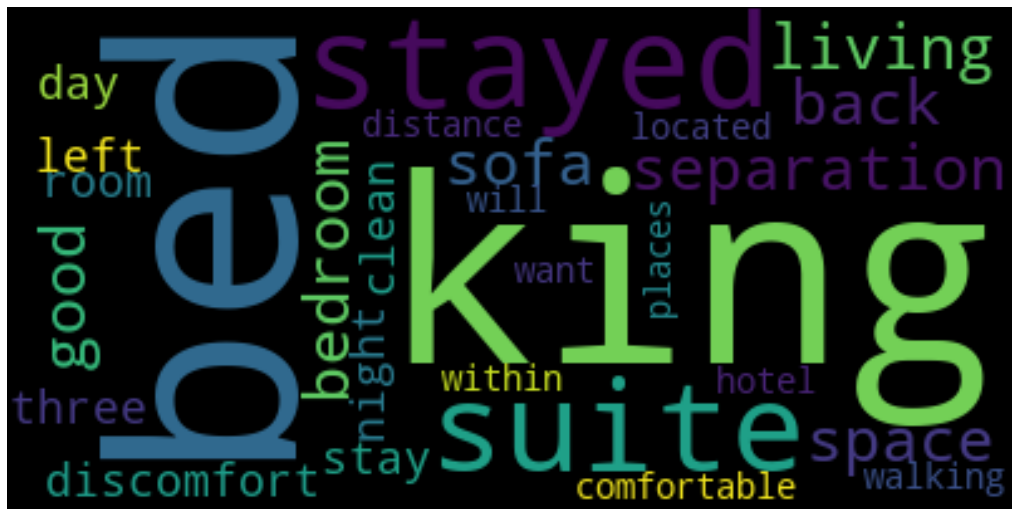

In [19]:
# word cloud only first row

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [20]:
#save wordcloud
wordcloud.to_file('wordcloud.png')

In [21]:
#collapse all row in a string 
text = " ".join(row for row in df['reviews.text'])

In [23]:
import numpy as np
from PIL import Image
mask = np.array(Image.open('images.jpg'))

FileNotFoundError: ignored

(-0.5, 293.5, 170.5, -0.5)

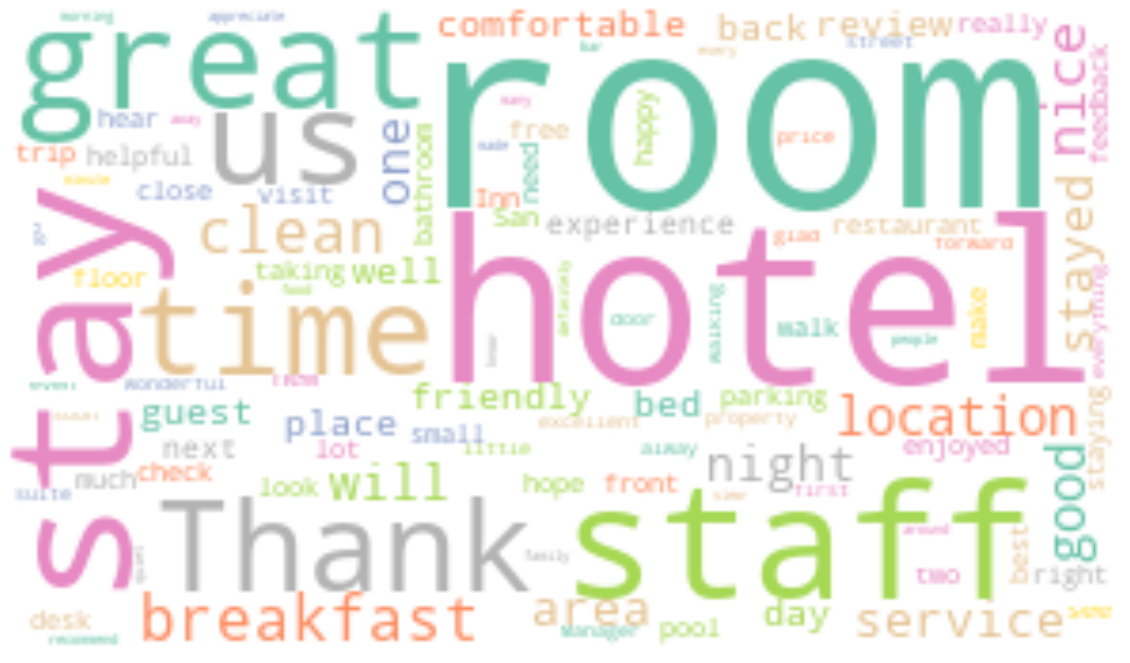

In [ ]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1,background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS, mask=mask,max_words=100).generate(text)
plt.figure(figsize=(20, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")